# Introduction

In this project, data visualisation asn exploration is done on a  dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by **American Community Survey**, which conducts surveys and aggregates the data.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

1. Rank - Rank by median earnings (the dataset is ordered by this column).

2. Major_code - Major code.

* Major - Major description.

* Major_category - Category of major.

* Total - Total number of people with major.

* Sample_size - Sample size (unweighted) of full-time.

* Men - Male graduates.

* Women - Female graduates.

* ShareWomen - Women as share of total.

* Employed - Number employed.

* Median - Median salary of full-time, year-round workers.

* Low_wage_jobs - Number in low-wage service jobs.

* Full_time - Number employed 35 hours or more.

* Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
print(recent_grads.head())
print('\n')
print(recent_grads.tail())


   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

## Generating the summary statistics for all the numeric rows

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Data Cleaning
The rows with missing values are dropped and the resulting Dataframe assigned back to `recent_grads`

In [6]:
raw_data_counts = recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
recent_grads = recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

## Scatter Plots 

Scatter plots are generated to explore the following relations between:

1. **Sample_size** and **Median**
* **Sample_size** and **Unemployment_rate**
* **Full_time** and **Median**
* **ShareWomen** and **Unemployment_rate**
* **Men** and **Median**
* **Women** and **Median**

The plots are used to explore the following questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?


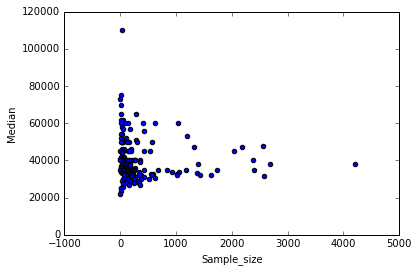

In [8]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

### Results 
From the scatter plot above, its observed that there is no strong correlation between the Median salaries of the employed students and Sample Size of a particular course. Thus, students in more popular majors do not make more money than their colleges who pursued other courses.

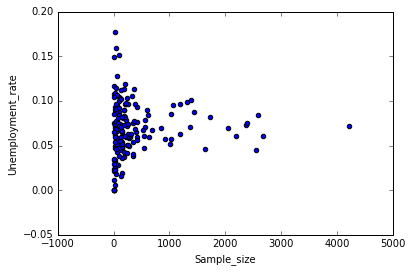

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

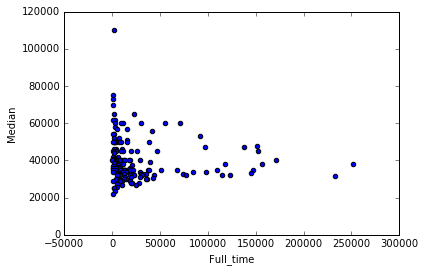

In [10]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

**Is there any link between the number of full-time employees and median salary?**





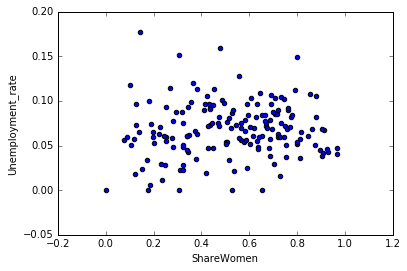

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

#### Another question we want to answer is that 'Do students that majored in subjects that were majority female make more money?'

This cannot be determined as there is no correlation

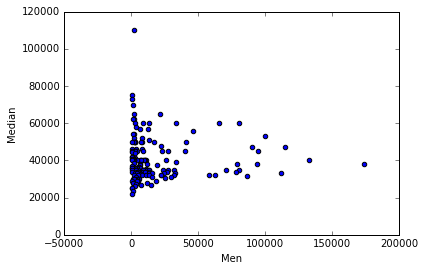

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

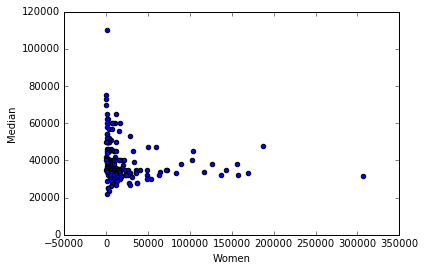

In [13]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

When it comes to the median salaries of **Men** and **Women**, Men and Women make identical salaries when looking at the less popular courses were as this may not be the same for the more popular courses

### Histograms are plotted to view the distribution of values in each column.

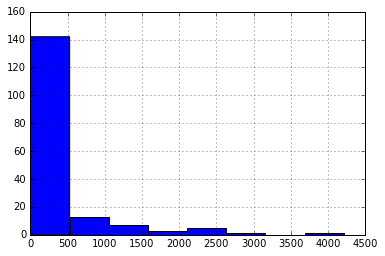

In [18]:
recent_grads['Sample_size'].hist(bins=8)

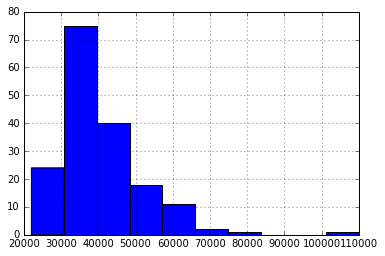

In [15]:
recent_grads['Median'].hist()

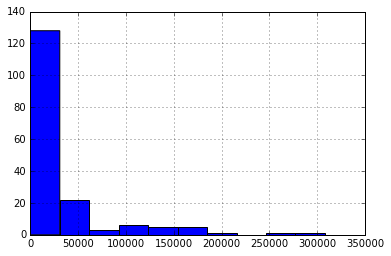

In [19]:
recent_grads['Employed'].hist(bins = 10)

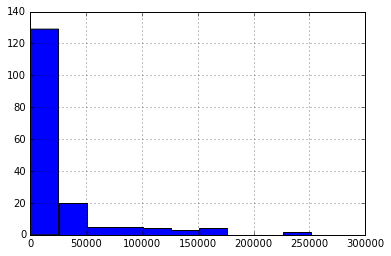

In [20]:
recent_grads['Full_time'].hist()

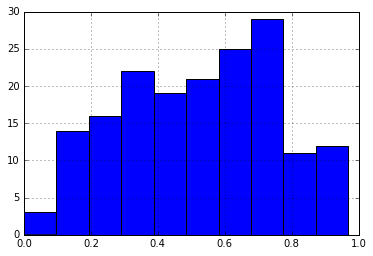

In [21]:
recent_grads['ShareWomen'].hist()

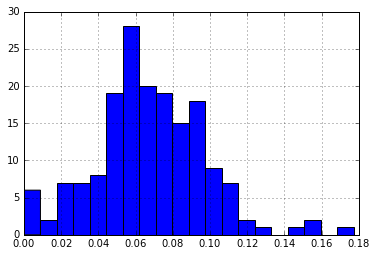

In [22]:
recent_grads['Unemployment_rate'].hist(bins=20)

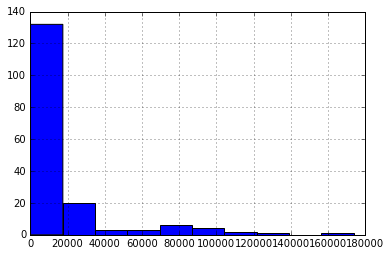

In [23]:
recent_grads['Men'].hist()

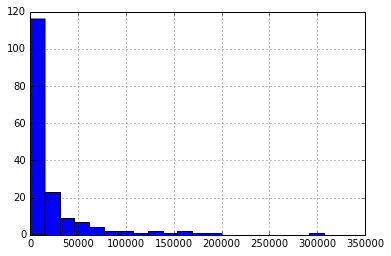

In [24]:
recent_grads['Women'].hist(bins=20)

### Scatter Matrix Plots 


In [25]:
from pandas.plotting import scatter_matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d6ba72da0>,
      dtype=object)

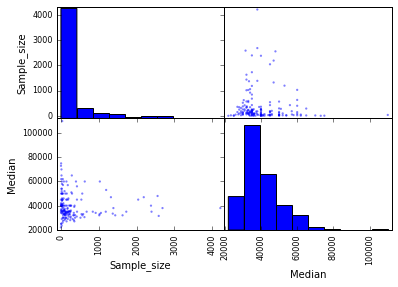

In [26]:
scatter_matrix(recent_grads[['Sample_size', 'Median']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d6b75d940>,
      dtype=object)

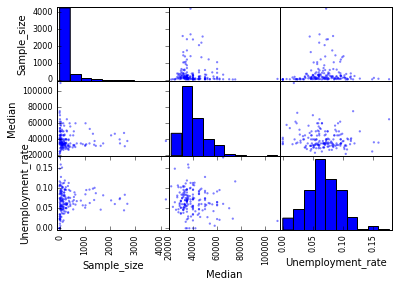

In [27]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

**The bar chart below shoes the percentage distribution of women in the top earning graduates **

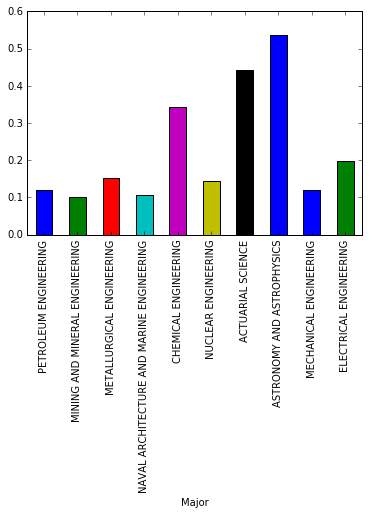

In [31]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

**The bar chart below shoes the percentage distribution of women in the least 10 earning graduates **

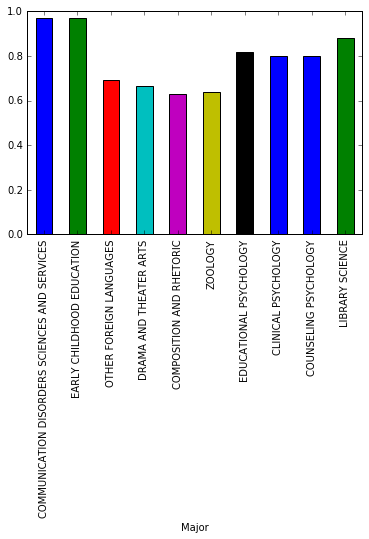

In [29]:
recent_grads.tail(10).plot.bar(x= 'Major', y='ShareWomen', legend=False)

**The bar chart below shoes the percentage distribution of unemployment amoung graduates in the top earning graduate programs **

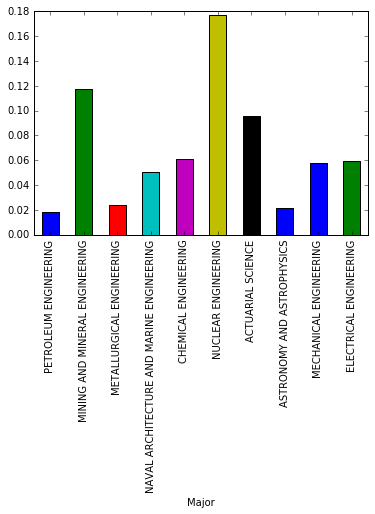

In [30]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)